# Classification Performance Assessment

Classification performance is different from regression performance.  Below we look at some of the calculations that 

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

import statsmodels.api as sm


In [2]:

def specificity_score(y_true, y_pred):
    """
    Calculate specificity.

    Args:
        y_true (list or numpy.ndarray): True labels.
        y_pred (list or numpy.ndarray): Predicted labels.

    Returns:
        float: Specificity score.
    """
    true_negatives = sum((y_true == 0) & (y_pred == 0))
    false_positives = sum((y_true == 0) & (y_pred == 1))
    
    if (true_negatives + false_positives) == 0:
      return 0.0
    
    specificity = true_negatives / (true_negatives + false_positives)
    return specificity

Let's apply these performance metrics to the Overdrawn data and models we fit last time.

In [3]:
# read in the monkey data
overdrawn = pd.read_csv("https://webpages.charlotte.edu/mschuck1/classes/DTSC2302/Overdrawn.csv")
# get info about these data
overdrawn.dropna(inplace=True)
overdrawn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 437 entries, 0 to 449
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        437 non-null    float64
 1   Sex        437 non-null    float64
 2   DaysDrink  437 non-null    float64
 3   Overdrawn  437 non-null    float64
dtypes: float64(4)
memory usage: 17.1 KB


The data is about students.  Here are the details on the variables in these data:

_Age_ =	Age of the student (in years)

_Sex_ =	0=male or 1=female

_DaysDrink_ = Number of days drinking alcohol (in past 30 days)

_Overdrawn_	= Has student overdrawn a checking account? 0=no or 1=yes

The first regression that we will do will use _DaysDrink_ as a predictor.

In [4]:
# center _Age_
overdrawn['Age']=overdrawn['Age']-overdrawn['Age'].mean()

overdrawn_X = overdrawn[['DaysDrink','Age','Sex']]
overdrawn_X = sm.add_constant(overdrawn_X)

overdrawn_y = overdrawn['Overdrawn']
model2_sm = sm.Logit(overdrawn_y, overdrawn_X).fit()

# Print the summary table, which includes p-values
print(model2_sm.summary())

Optimization terminated successfully.
         Current function value: 0.350185
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Overdrawn   No. Observations:                  437
Model:                          Logit   Df Residuals:                      433
Method:                           MLE   Df Model:                            3
Date:                Fri, 21 Mar 2025   Pseudo R-squ.:                 0.08532
Time:                        09:43:39   Log-Likelihood:                -153.03
converged:                       True   LL-Null:                       -167.30
Covariance Type:            nonrobust   LLR p-value:                 2.787e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2975      0.368     -8.961      0.000      -4.019      -2.576
DaysDrink      0.0707      0.

In [5]:
# create y_true which is 'ground truth' values for overdrawn
y_true=overdrawn_y
# create predicted values of 0/1 for from the model and call the y_pred
y_pred=(model2_sm.predict(overdrawn_X)>0.5).astype(int)


# confusion Matrix

In [6]:
# make the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[380   1]
 [ 56   0]]


What does each of the values in the above confusion matrix represent?

# Display confusion matrix

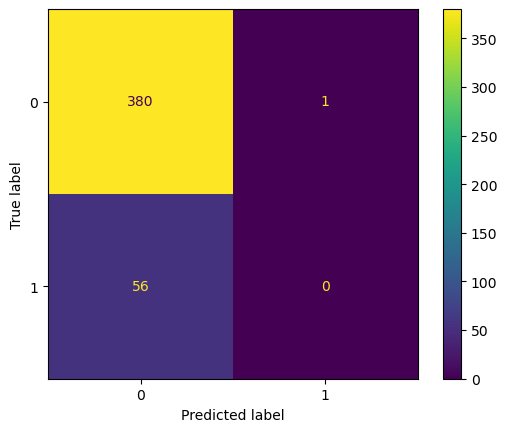

In [7]:
# here is a visual way to display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()


### Tasks

From the above confusion matrix, 

1. calculate accuracy, 


86.9


2. calculate precision, 


0


3. calculate recall, 


0


4. calculate specificity.

99.7

 
Empty space here.  More code below











In [16]:
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8696


In [13]:
precision = precision_score(y_true, y_pred)
print(f"Precision: {precision:.4f}")

Precision: 0.0000


In [14]:
specificity = specificity_score(y_true, y_pred)
print(f"Specificity: {specificity:.4f}")

Specificity: 0.9974


In [15]:
recall = recall_score(y_true, y_pred)
print(f"Recall: {recall:.4f}")

Recall: 0.0000


Do your answers agree with the output from the Python functions?  If not, why not?

not at first, you have to look at the column labels of 1s and 0s (1,1 = true positive & 0,0 = true negative)